In [9]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [10]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape the data to (28, 28, 1) and normalize to [0, 1]
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [5]:
# Define CNN model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # Convolutional layer
    MaxPooling2D(pool_size=(2, 2)),                                   # Max pooling layer
    Conv2D(64, (3, 3), activation='relu'),                            # Second convolutional layer
    MaxPooling2D(pool_size=(2, 2)),                                   # Max pooling layer
    Conv2D(128, (3, 3), activation='relu'),                           # Third convolutional layer
    MaxPooling2D(pool_size=(2, 2)),                                   # Max pooling layer
    Flatten(),                                                        # Flatten the 3D output to 1D
    Dense(128, activation='relu'),                                    # Fully connected layer
    Dense(10, activation='softmax')                                   # Output layer for 10 classes (digits 0-9)
])

In [6]:
# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
938/938 [==============================] - 26s 27ms/step - loss: 0.2250 - accuracy: 0.9299 - val_loss: 0.1002 - val_accuracy: 0.9697
Epoch 2/10
938/938 [==============================] - 27s 29ms/step - loss: 0.0749 - accuracy: 0.9765 - val_loss: 0.0897 - val_accuracy: 0.9731
Epoch 3/10
938/938 [==============================] - 28s 30ms/step - loss: 0.0528 - accuracy: 0.9834 - val_loss: 0.0484 - val_accuracy: 0.9849
Epoch 4/10
938/938 [==============================] - 33s 35ms/step - loss: 0.0410 - accuracy: 0.9871 - val_loss: 0.0616 - val_accuracy: 0.9807
Epoch 5/10
938/938 [==============================] - 28s 30ms/step - loss: 0.0332 - accuracy: 0.9900 - val_loss: 0.0483 - val_accuracy: 0.9858
Epoch 6/10
938/938 [==============================] - 30s 31ms/step - loss: 0.0264 - accuracy: 0.9922 - val_loss: 0.0480 - val_accuracy: 0.9878
Epoch 7/10
938/938 [==============================] - 29s 31ms/step - loss: 0.0227 - accuracy: 0.9926 - val_loss: 0.0494 - val_accuracy:

In [7]:
# Evaluate the model's performance on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy}")

313/313 [==============================] - 3s 8ms/step - loss: 0.0591 - accuracy: 0.9849
Test accuracy: 0.9848999977111816


1/1 [==============================] - 0s 81ms/step


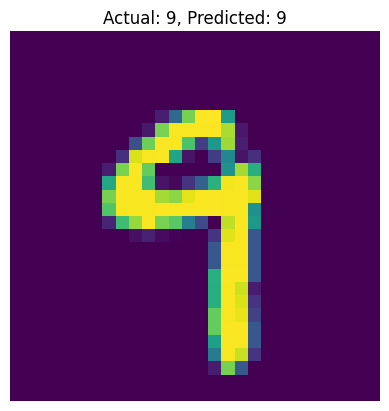

1/1 [==============================] - 0s 65ms/step


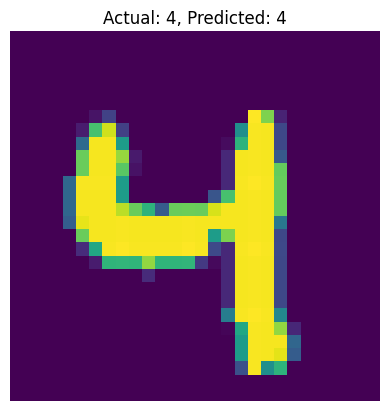

1/1 [==============================] - 0s 69ms/step


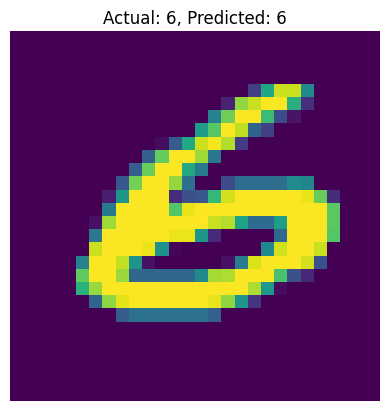

1/1 [==============================] - 0s 69ms/step


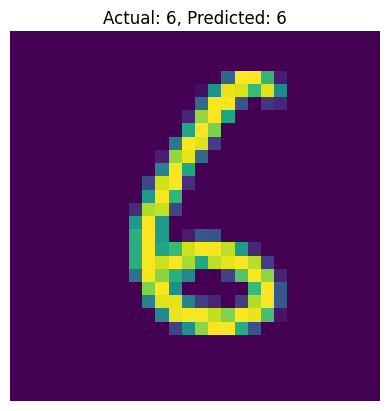

1/1 [==============================] - 0s 64ms/step


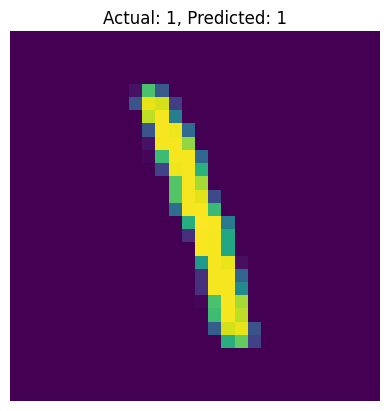

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Define the class names (digits 0-9)
class_names = [str(i) for i in range(10)]

# Select random indices for test images
random_indices = random.sample(range(x_test.shape[0]), 5)

# Display predictions for a few random images
for i, index in enumerate(random_indices):
    img = x_test[index]  # Get the image from the test set
    true_label = np.argmax(y_test[index])  # True label of the image
    prediction = model.predict(np.expand_dims(img, axis=0))  # Model prediction
    predicted_label = np.argmax(prediction)  # Get index of the highest probability

    # Display the image and predicted vs. actual label
    plt.imshow(img.reshape(28, 28))
    plt.title(f"Actual: {class_names[true_label]}, Predicted: {class_names[predicted_label]}")
    plt.axis('off')
    plt.show()